In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned/Training/Pituitary/image1_80.png
/kaggle/input/cleaned/Training/Pituitary/image1_930.png
/kaggle/input/cleaned/Training/Pituitary/image1_369.png
/kaggle/input/cleaned/Training/Pituitary/image1_39.png
/kaggle/input/cleaned/Training/Pituitary/image1_717.png
/kaggle/input/cleaned/Training/Pituitary/image1_622.png
/kaggle/input/cleaned/Training/Pituitary/image1_343.png
/kaggle/input/cleaned/Training/Pituitary/image1_891.png
/kaggle/input/cleaned/Training/Pituitary/image1_734.png
/kaggle/input/cleaned/Training/Pituitary/image1_738.png
/kaggle/input/cleaned/Training/Pituitary/image1_149.png
/kaggle/input/cleaned/Training/Pituitary/image1_526.png
/kaggle/input/cleaned/Training/Pituitary/image1_404.png
/kaggle/input/cleaned/Training/Pituitary/image1_111.png
/kaggle/input/cleaned/Training/Pituitary/image1_47.png
/kaggle/input/cleaned/Training/Pituitary/image1_162.png
/kaggle/input/cleaned/Training/Pituitary/image1_745.png
/kaggle/input/cleaned/Training/Pituitary/image1_763

# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.resnet import ResNet50,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_dir = '/kaggle/input/cleaned/Training/'
test_dir = '/kaggle/input/cleaned/Testing/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [4]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+label):
        test_paths.append(test_dir+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

# Visualizing class distribution

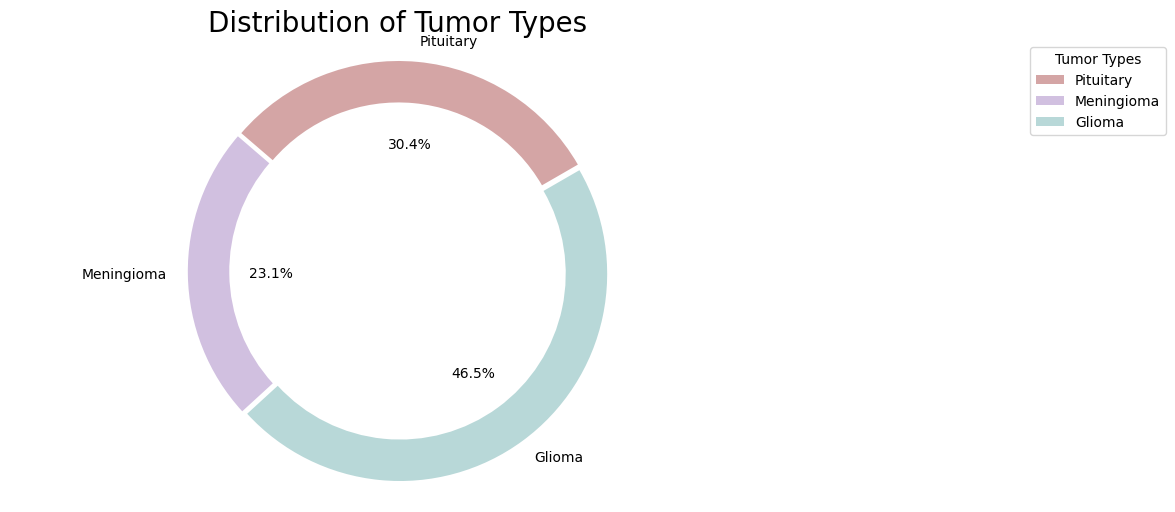

In [5]:
import matplotlib.pyplot as plt

# Data
labels = ['Pituitary', 'Meningioma', 'Glioma']
sizes = [
    len([x for x in train_labels if x == 'Pituitary']),
    len([x for x in train_labels if x == 'Meningioma']),
    len([x for x in train_labels if x == 'Glioma'])
]

# Custom color palette for a brain tumor vibe
colors = ['#D4A5A5','#D1C0E0', '#B8D8D8']
explode = (0.015, 0.015, 0.015)

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', explode=explode, startangle=30, wedgeprops=dict(width=0.2))

# Title
plt.title('Distribution of Tumor Types', fontsize=20)

# Add a legend
plt.legend(labels, title='Tumor Types', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

# Distribution of Data between Train and Test Sets

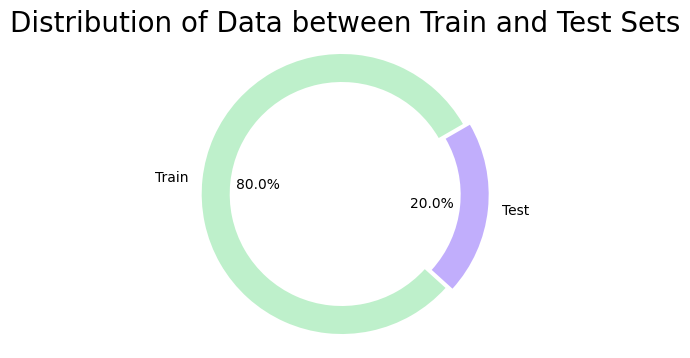

In [6]:
import matplotlib.pyplot as plt

# Data
labels = ['Train', 'Test']
sizes = [len(train_labels), len(test_labels)]
colors = ['#BEF0CB', '#C1AEFC']
explode = (0.05, 0)

# Plotting
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', explode=explode, startangle=30, wedgeprops=dict(width=0.2))

# Title
plt.title('Distribution of Data between Train and Test Sets', fontsize=20)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


In [7]:
sizes = [
    len([x for x in train_labels if x == 'Pituitary']),
    len([x for x in train_labels if x == 'Meningioma']),
    len([x for x in train_labels if x == 'Glioma'])
]
sizes

[744, 566, 1140]

# Count of each class

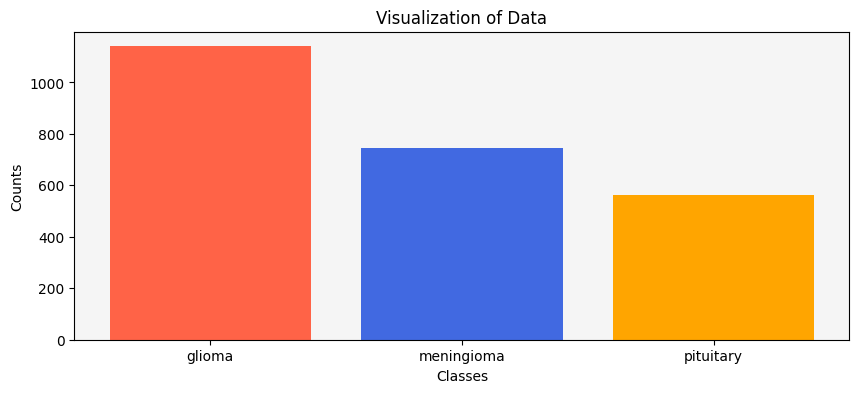

In [8]:
plt.figure(figsize=(10,4))
colors = ['#FF6347',  # Red for glioma
          '#4169E1',  # Blue for meningioma
          '#FFA500']  # Orange for pituitary
plt.bar(['glioma','meningioma','pituitary'],[1140,744,564],color=colors)

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Visualization of Data')
plt.gca().set_facecolor('#F5F5F5')
plt.show()

In [9]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [10]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [11]:
tr_df = train_df('/kaggle/input/cleaned/Training')
ts_df = test_df('/kaggle/input/cleaned/Testing/')

In [12]:
ts_df.head(1000)

,Class Path,Class
0,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
1,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
2,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
3,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
4,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
...,...,...
609,/kaggle/input/cleaned/Testing/Glioma/image1_11...,Glioma
610,/kaggle/input/cleaned/Testing/Glioma/image1_37...,Glioma
611,/kaggle/input/cleaned/Testing/Glioma/image1_25...,Glioma
612,/kaggle/input/cleaned/Testing/Glioma/image1_10...,Glioma


# Creating validation dataset

In [13]:
train_df,valid_df = train_test_split(tr_df, train_size=.9, random_state=20)

# Data generators for Image Augmentation

In [14]:
image_size = (256, 256)

# Training batch size
batch_size = 32

SEED=1345

train_datagen=ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")

validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


tr_gen = train_datagen.flow_from_dataframe(train_df, x_col='Class Path',
                                 y_col='Class',
                                 target_size=image_size,seed = SEED,
                                 batch_size=32,
                                 class_mode ='categorical',)

valid_gen = validation_datagen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',
                                    target_size=image_size,seed = SEED,
                                    batch_size=32,
                                    class_mode ='categorical',)

ts_gen = test_datagen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',
                                 target_size=image_size,shuffle=False,
                                 seed = SEED,
                                 batch_size=32,
                                 class_mode ='categorical',)

Found 2205 validated image filenames belonging to 3 classes.
Found 245 validated image filenames belonging to 3 classes.
Found 614 validated image filenames belonging to 3 classes.


# Visualizing Data

In [15]:
class_names=list(tr_gen.class_indices.keys())

In [16]:
class_names

['Glioma', 'Meningioma', 'Pituitary']

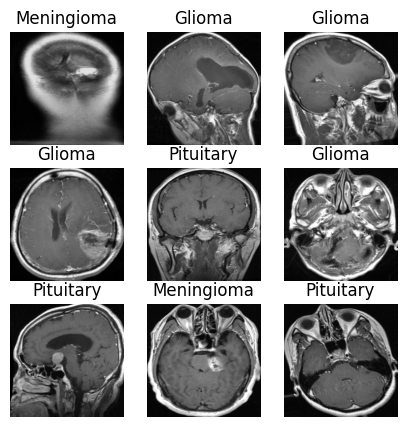

In [17]:
plt.figure(figsize=(5, 5))
for images, labels in tr_gen:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break

In [18]:
earlystopping=EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=15,
                           verbose=1)


callback_list=[earlystopping]

# Model Creation EfficientNetB7

In [19]:
image_size = (256,256,3)
# Create an instance of the DenseNet201 model
EfficientNetB7 = tf.keras.applications.EfficientNetB7(
    include_top=False, weights="imagenet", input_shape=image_size, pooling=None
)

# Freeze the layers of the ResNet152 model
for layer in EfficientNetB7.layers:
    layer.trainable = False

# Create a new model with additional layers
model = Sequential([
    EfficientNetB7,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer with 50% dropout rate
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout layer with 50% dropout rate
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout layer with 50% dropout rate
    Dense(3, activation='softmax')  # Adjust the number of units based on your output classes
])
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

258076736/258076736 [==============================] - 1s 0us/step


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 8, 8, 2560)        64097687  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 2560)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 2560)              10240     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)               1311232   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

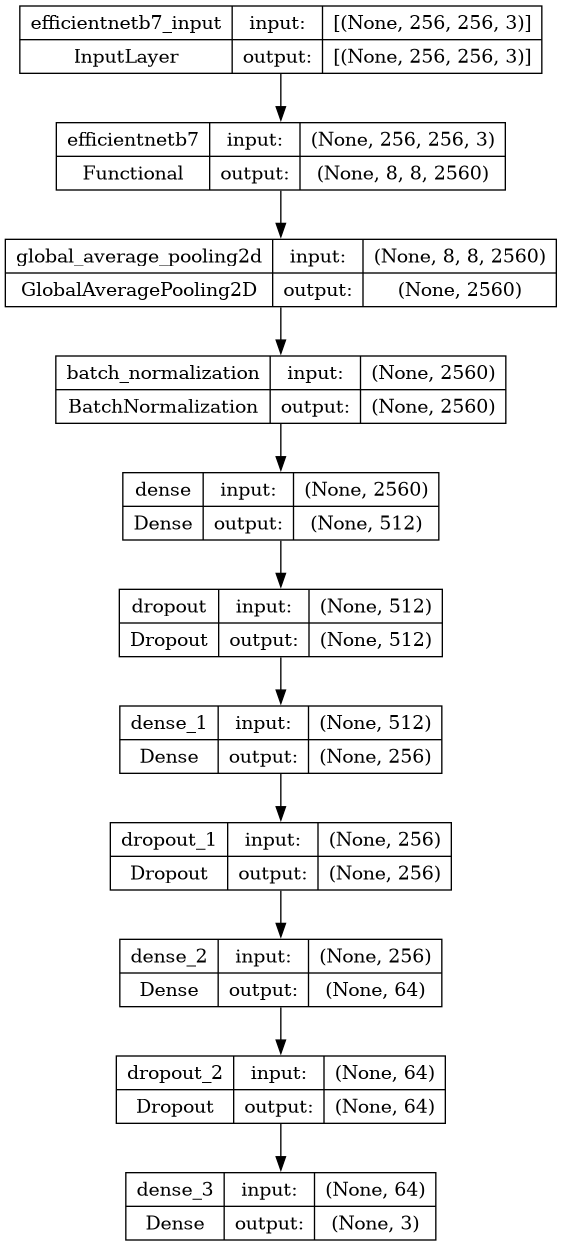

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='modelEfficientNetB7_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
steps_per_epoch = tr_gen.samples // 32
validation_steps = valid_gen.samples // 32
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_accuracy',
                           mode='max', factor=0.3, patience=5, verbose=True)

# Training the model
history = model.fit(tr_gen,
                    steps_per_epoch=len(tr_gen),
                    epochs=20,verbose = 1,
                    validation_data=valid_gen,
                    validation_steps=validation_steps,
                    callbacks=[model_es, model_rlr])

Epoch 1/20


2024-03-21 17:42:49.685226: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetb7/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


69/69 [==============================] - 100s 1s/step - loss: 2.5255 - accuracy: 0.3592 - auc: 0.5361 - precision: 0.3571 - recall: 0.3066 - val_loss: 1.0922 - val_accuracy: 0.4241 - val_auc: 0.5905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/20
69/69 [==============================] - 51s 731ms/step - loss: 1.3488 - accuracy: 0.4122 - auc: 0.5724 - precision: 0.4280 - recall: 0.2091 - val_loss: 1.0944 - val_accuracy: 0.3884 - val_auc: 0.5752 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/20
69/69 [==============================] - 50s 723ms/step - loss: 1.1969 - accuracy: 0.4263 - auc: 0.5683 - precision: 0.4061 - recall: 0.0961 - val_loss: 1.0911 - val_accuracy: 0.3929 - val_auc: 0.5734 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/20
69/69 [==============================] - 51s 737ms/step - loss: 1.1396 - accuracy: 0.4531 - auc: 0.5955 - precision: 0.3943 - recall: 0.0567 - val_loss: 1.0889 - val_ac

In [23]:
result = model.evaluate(ts_gen)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')

20/20 [==============================] - 8s 423ms/step - loss: 1.0576 - accuracy: 0.4658 - auc: 0.6230 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Loss = 1.057566523551941
Test Accuracy = 0.4657980501651764
Test AUC = 0.6230471134185791
Test Precision = 0.0
Test Recall = 0.0


In [24]:
history.history['loss']

[2.5255086421966553,
 1.3487892150878906,
 1.1969443559646606,
 1.1396028995513916,
 1.0986746549606323,
 1.0966027975082397,
 1.0771740674972534,
 1.0756192207336426,
 1.0608140230178833,
 1.0657092332839966,
 1.064971923828125,
 1.062059760093689,
 1.0611379146575928,
 1.066422462463379,
 1.0694252252578735,
 1.06204092502594,
 1.0609467029571533]

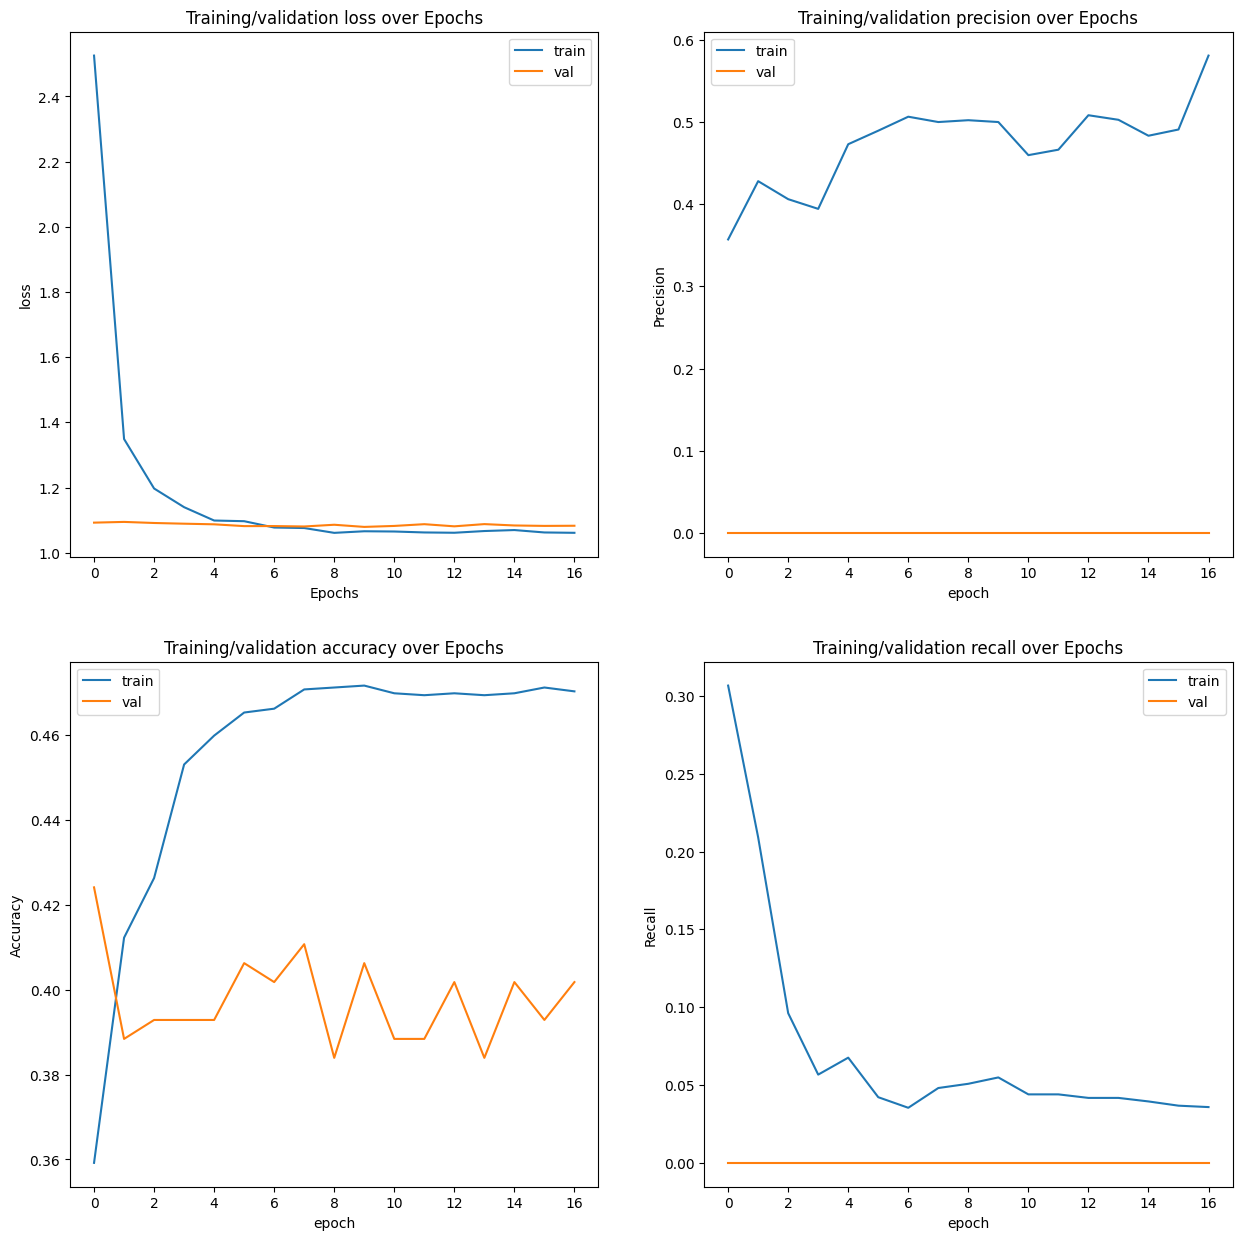

In [25]:
figure , axis = plt.subplots(2,2,figsize=(15,15))


axis[0,0].plot(history.history['loss'] , label='train')
axis[0,0].plot(history.history['val_loss'] , label='val')
axis[0,0].set_title('Training/validation loss over Epochs')
axis[0,0].set_xlabel('Epochs')
axis[0,0].set_ylabel('loss')
axis[0,0].legend()


axis[1,0].plot(history.history['accuracy'], label='train')
axis[1,0].plot(history.history['val_accuracy'], label='val')
axis[1,0].set_title('Training/validation accuracy over Epochs')
axis[1,0].set_xlabel('epoch')
axis[1,0].set_ylabel('Accuracy')
axis[1,0].legend()


axis[0,1].plot(history.history['precision'], label='train')
axis[0,1].plot(history.history['val_precision'], label='val')
axis[0,1].set_title('Training/validation precision over Epochs')
axis[0,1].set_xlabel('epoch')
axis[0,1].set_ylabel('Precision')
axis[0,1].legend()


axis[1,1].plot(history.history['recall'], label='train')
axis[1,1].plot(history.history['val_recall'], label='val')
axis[1,1].set_title('Training/validation recall over Epochs')
axis[1,1].set_xlabel('epoch')
axis[1,1].set_ylabel('Recall')
axis[1,1].legend()

# Test data predictions

In [26]:
test_label=ts_gen.classes
Y_pred=model.predict(ts_gen)
y_pred=[]
[y_pred.append(np.argmax(l)) for l in Y_pred ]

20/20 [==============================] - 10s 256ms/step


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [27]:
y_pred=np.array(y_pred)

# Confusion Matrix

<Figure size 800x600 with 0 Axes>

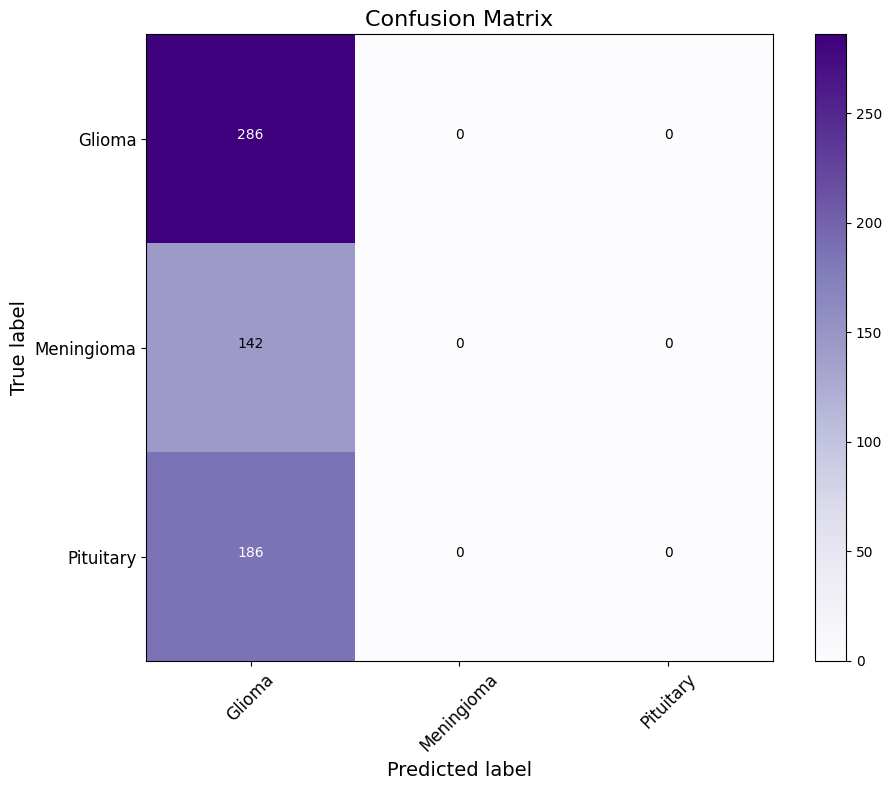

In [28]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, cmap=plt.cm.Purples):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix', fontsize=16)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = 'd'
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black",
                 fontsize=10)

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.tight_layout()

# Example confusion matrix
cm = confusion_matrix(test_label, y_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, class_names)
plt.show()


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       286
           1       0.00      0.00      0.00       142
           2       0.00      0.00      0.00       186

    accuracy                           0.47       614
   macro avg       0.16      0.33      0.21       614
weighted avg       0.22      0.47      0.30       614



In [30]:
import pickle
pickle.dump(model, open('EfficientNetB7', 'wb'))